In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Cursos"
!ls

/content/drive/MyDrive/Cursos
dataset    model2.h5	  modelo2.ipynb  visualizacion.ipynb
model1.h5  modelo1.ipynb  modelo3.ipynb


#### Etiquetar las imagenes

In [ ]:
data_directory = pathlib.Path('./dataset/train/')
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['Mahindra Scorpio', 'Hyundai Creta', 'Audi', 'Swift', 'Tata Safari', 'Rolls Royce', 'Toyota Innova']


#### Cargar los datos

In [ ]:
# Cargar los datos
data_gen = ImageDataGenerator(rescale=1./255,
                              horizontal_flip = False,
                              validation_split=0.2)

train_dir = "./dataset/train"
test_dir = "./dataset/test"

path = "/dataset"

train_data = data_gen.flow_from_directory("./dataset/train/", 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'sparse')
val_data = data_gen.flow_from_directory("./dataset/test/", 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'sparse')

Found 2684 images belonging to 7 classes.
Found 160 images belonging to 7 classes.


In [ ]:
def plot_random_images(num):
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(5, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == num+1:
            break

    plt.tight_layout()       
    plt.show()

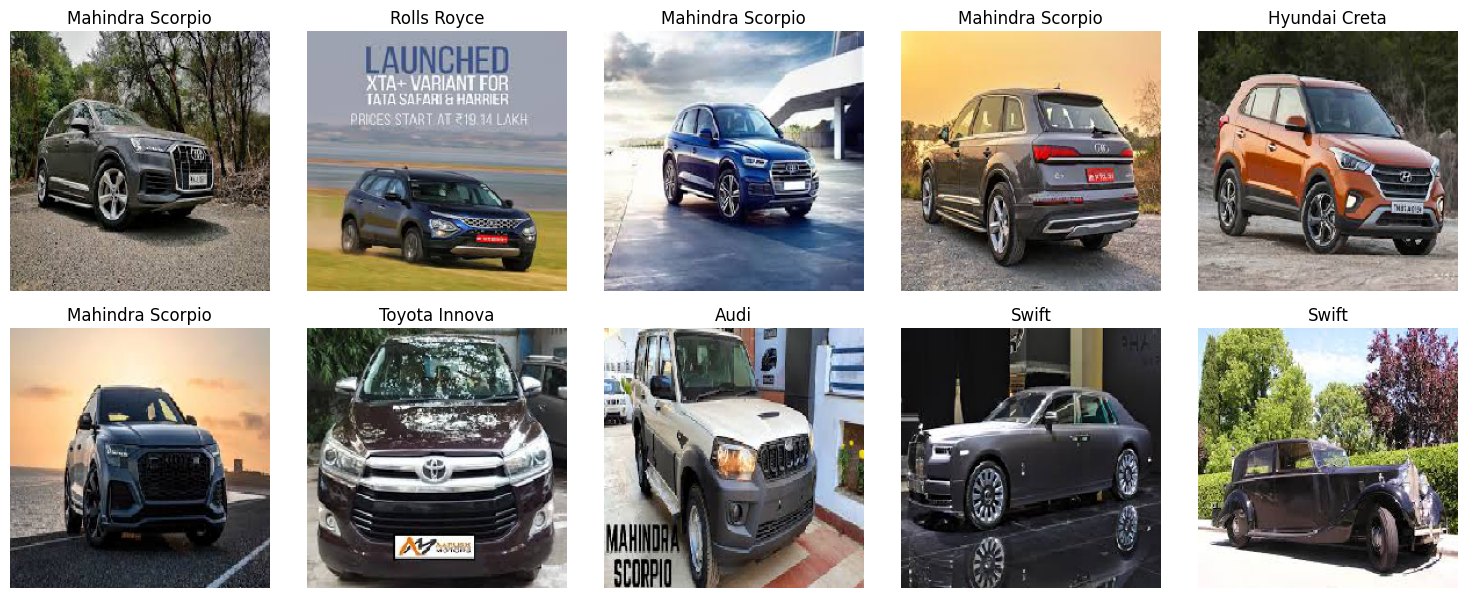

In [ ]:
plot_random_images(10)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                #    width_shift_range = 0.2,
                                #    height_shift_range = 0.2,
                                #    shear_range = 0.3,
								#    zoom_range = 0.3,
									horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

test_generator = test_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

Found 3352 images belonging to 7 classes.
Found 3352 images belonging to 7 classes.


<Figure size 640x480 with 0 Axes>

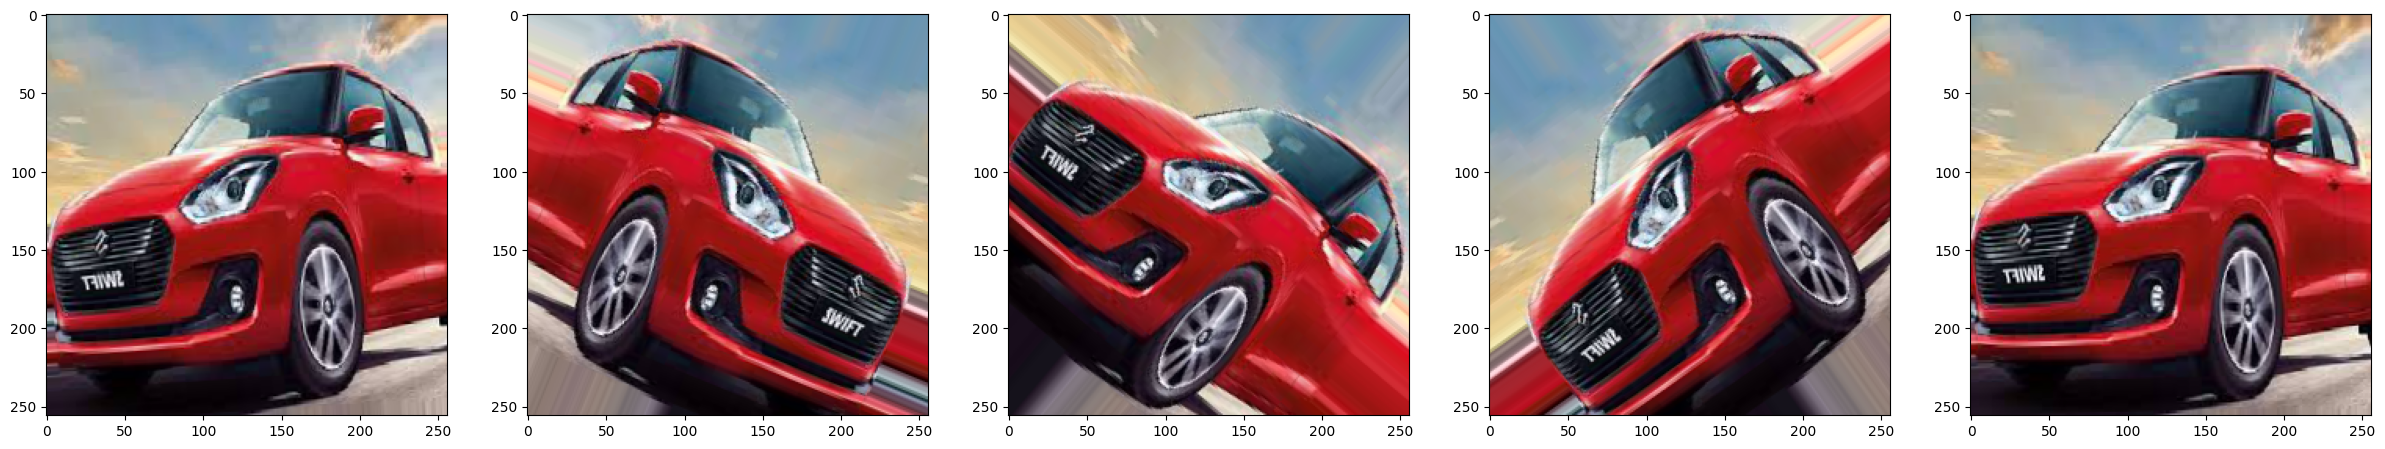

In [ ]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (256, 256),
                          							batch_size = 64,
                                                    class_mode ='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(256,256),
                                                  batch_size = 64,
                                                  class_mode="categorical")

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


(64, 256, 256, 3)
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.

<Figure size 640x480 with 0 Axes>

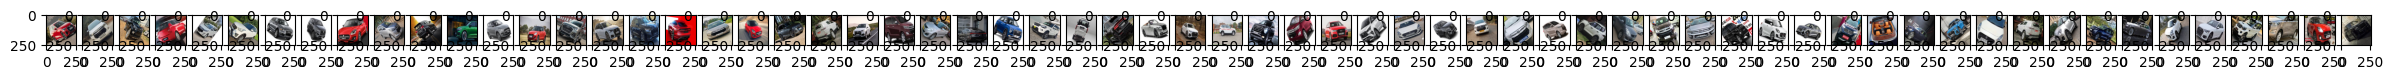

In [ ]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

# Modelo 3

In [ ]:
model = Sequential([
        layers.Conv2D(128, (3,3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(256, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(512, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(512, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 512)      0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=25,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
      verbose=1)

Epoch 1/25
52/52 [==============================] - 840s 16s/step - loss: 2.5474 - acc: 0.2396 - val_loss: 1.8267 - val_acc: 0.2817
Epoch 2/25
52/52 [==============================] - 83s 2s/step - loss: 1.8122 - acc: 0.2834 - val_loss: 1.7817 - val_acc: 0.3038
Epoch 3/25
52/52 [==============================] - 83s 2s/step - loss: 1.7375 - acc: 0.3359 - val_loss: 1.6756 - val_acc: 0.3998
Epoch 4/25
52/52 [==============================] - 83s 2s/step - loss: 1.6735 - acc: 0.3860 - val_loss: 1.6081 - val_acc: 0.4071
Epoch 5/25
52/52 [==============================] - 86s 2s/step - loss: 1.6037 - acc: 0.4126 - val_loss: 1.5017 - val_acc: 0.4772
Epoch 6/25
52/52 [==============================] - 85s 2s/step - loss: 1.4882 - acc: 0.4514 - val_loss: 1.4075 - val_acc: 0.5154
Epoch 7/25
52/52 [==============================] - 90s 2s/step - loss: 1.4005 - acc: 0.4922 - val_loss: 1.3054 - val_acc: 0.5240
Epoch 8/25
52/52 [==============================] - 88s 2s/step - loss: 1.2797 - acc: 0.

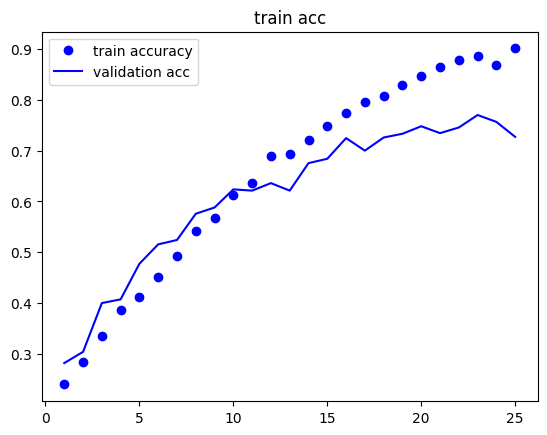

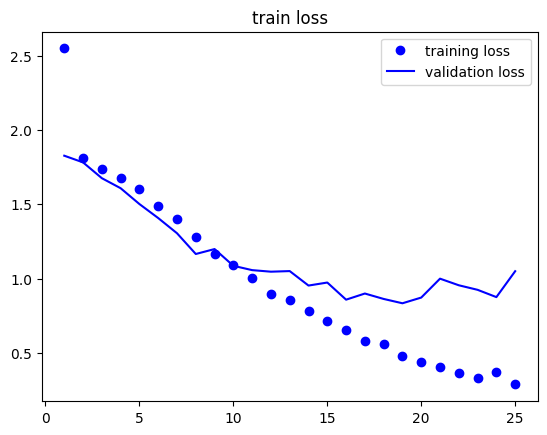

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc,'bo',label='train accuracy')
plt.plot(epochs, val_acc,'b',label='validation acc')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('train loss')
plt.legend()

plt.show()

In [21]:
model.save("model3.h5")

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps = 4)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

4/4 [==============================] - 4s 1s/step - loss: 1.0038 - acc: 0.7578

test acc :
 0.7578125

test loss :
 1.0038481950759888
